In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/bank-additional/bank-additional-full.csv', delimiter=';')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
print(df.head())

# Print a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics of the DataFrame's numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the DataFrame:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.c

In [4]:
import numpy as np

# Identify categorical columns (object type)
categorical_cols = df.select_dtypes(include='object').columns

print("Analyzing 'unknown' values in categorical columns:")
for col in categorical_cols:
    if 'unknown' in df[col].unique():
        unknown_count = (df[col] == 'unknown').sum()
        unknown_percentage = (unknown_count / len(df)) * 100
        print(f"Column '{col}': {unknown_count} 'unknown' values ({unknown_percentage:.2f}%)")

print("\nReviewing unique values for potential inconsistencies in all categorical columns:")
for col in categorical_cols:
    print(f"\nColumn '{col}' unique values: {df[col].unique()}")


Analyzing 'unknown' values in categorical columns:
Column 'job': 330 'unknown' values (0.80%)
Column 'marital': 80 'unknown' values (0.19%)
Column 'education': 1731 'unknown' values (4.20%)
Column 'default': 8597 'unknown' values (20.87%)
Column 'housing': 990 'unknown' values (2.40%)
Column 'loan': 990 'unknown' values (2.40%)

Reviewing unique values for potential inconsistencies in all categorical columns:

Column 'job' unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Column 'marital' unique values: ['married' 'single' 'divorced' 'unknown']

Column 'education' unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Column 'default' unique values: ['no' 'unknown' 'yes']

Column 'housing' unique values: ['no' 'yes' 'unknown']

Column 'loan' unique values: ['no' 'yes' 'unknown']

Column 'contact' 

In [5]:
X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})

print("Target variable 'y' head:")
print(y.head())
print("\nFeatures 'X' head:")
print(X.head())

Target variable 'y' head:
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

Features 'X' head:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

 

In [6]:
X_categorical = X.select_dtypes(include='object')
X_numerical = X.select_dtypes(exclude='object')

X_encoded = pd.get_dummies(X_categorical, drop_first=True)

X_processed = pd.concat([X_numerical, X_encoded], axis=1)

print("Shape of original features X:", X.shape)
print("Shape of processed features X_processed:", X_processed.shape)
print("First 5 rows of processed features X_processed:")
print(X_processed.head())

Shape of original features X: (41188, 20)
Shape of processed features X_processed: (41188, 53)
First 5 rows of processed features X_processed:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_may  month_nov  \
0          -36.4      4.857       5191.0  ...       True      False   
1          -36.4      4.857       5191.0  ...       True      False   
2          -36.4      4.857       5191.0  ...       True      False   
3          -36.4      4.857       5191.0  ...       True      False   
4          -36.4      4.857       5191.

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (28831, 53)
Shape of X_test: (12357, 53)
Shape of y_train: (28831,)
Shape of y_test: (12357,)


In [8]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree Classifier
dtree_classifier = DecisionTreeClassifier(max_depth=7, random_state=42)

# Train the classifier
dtree_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


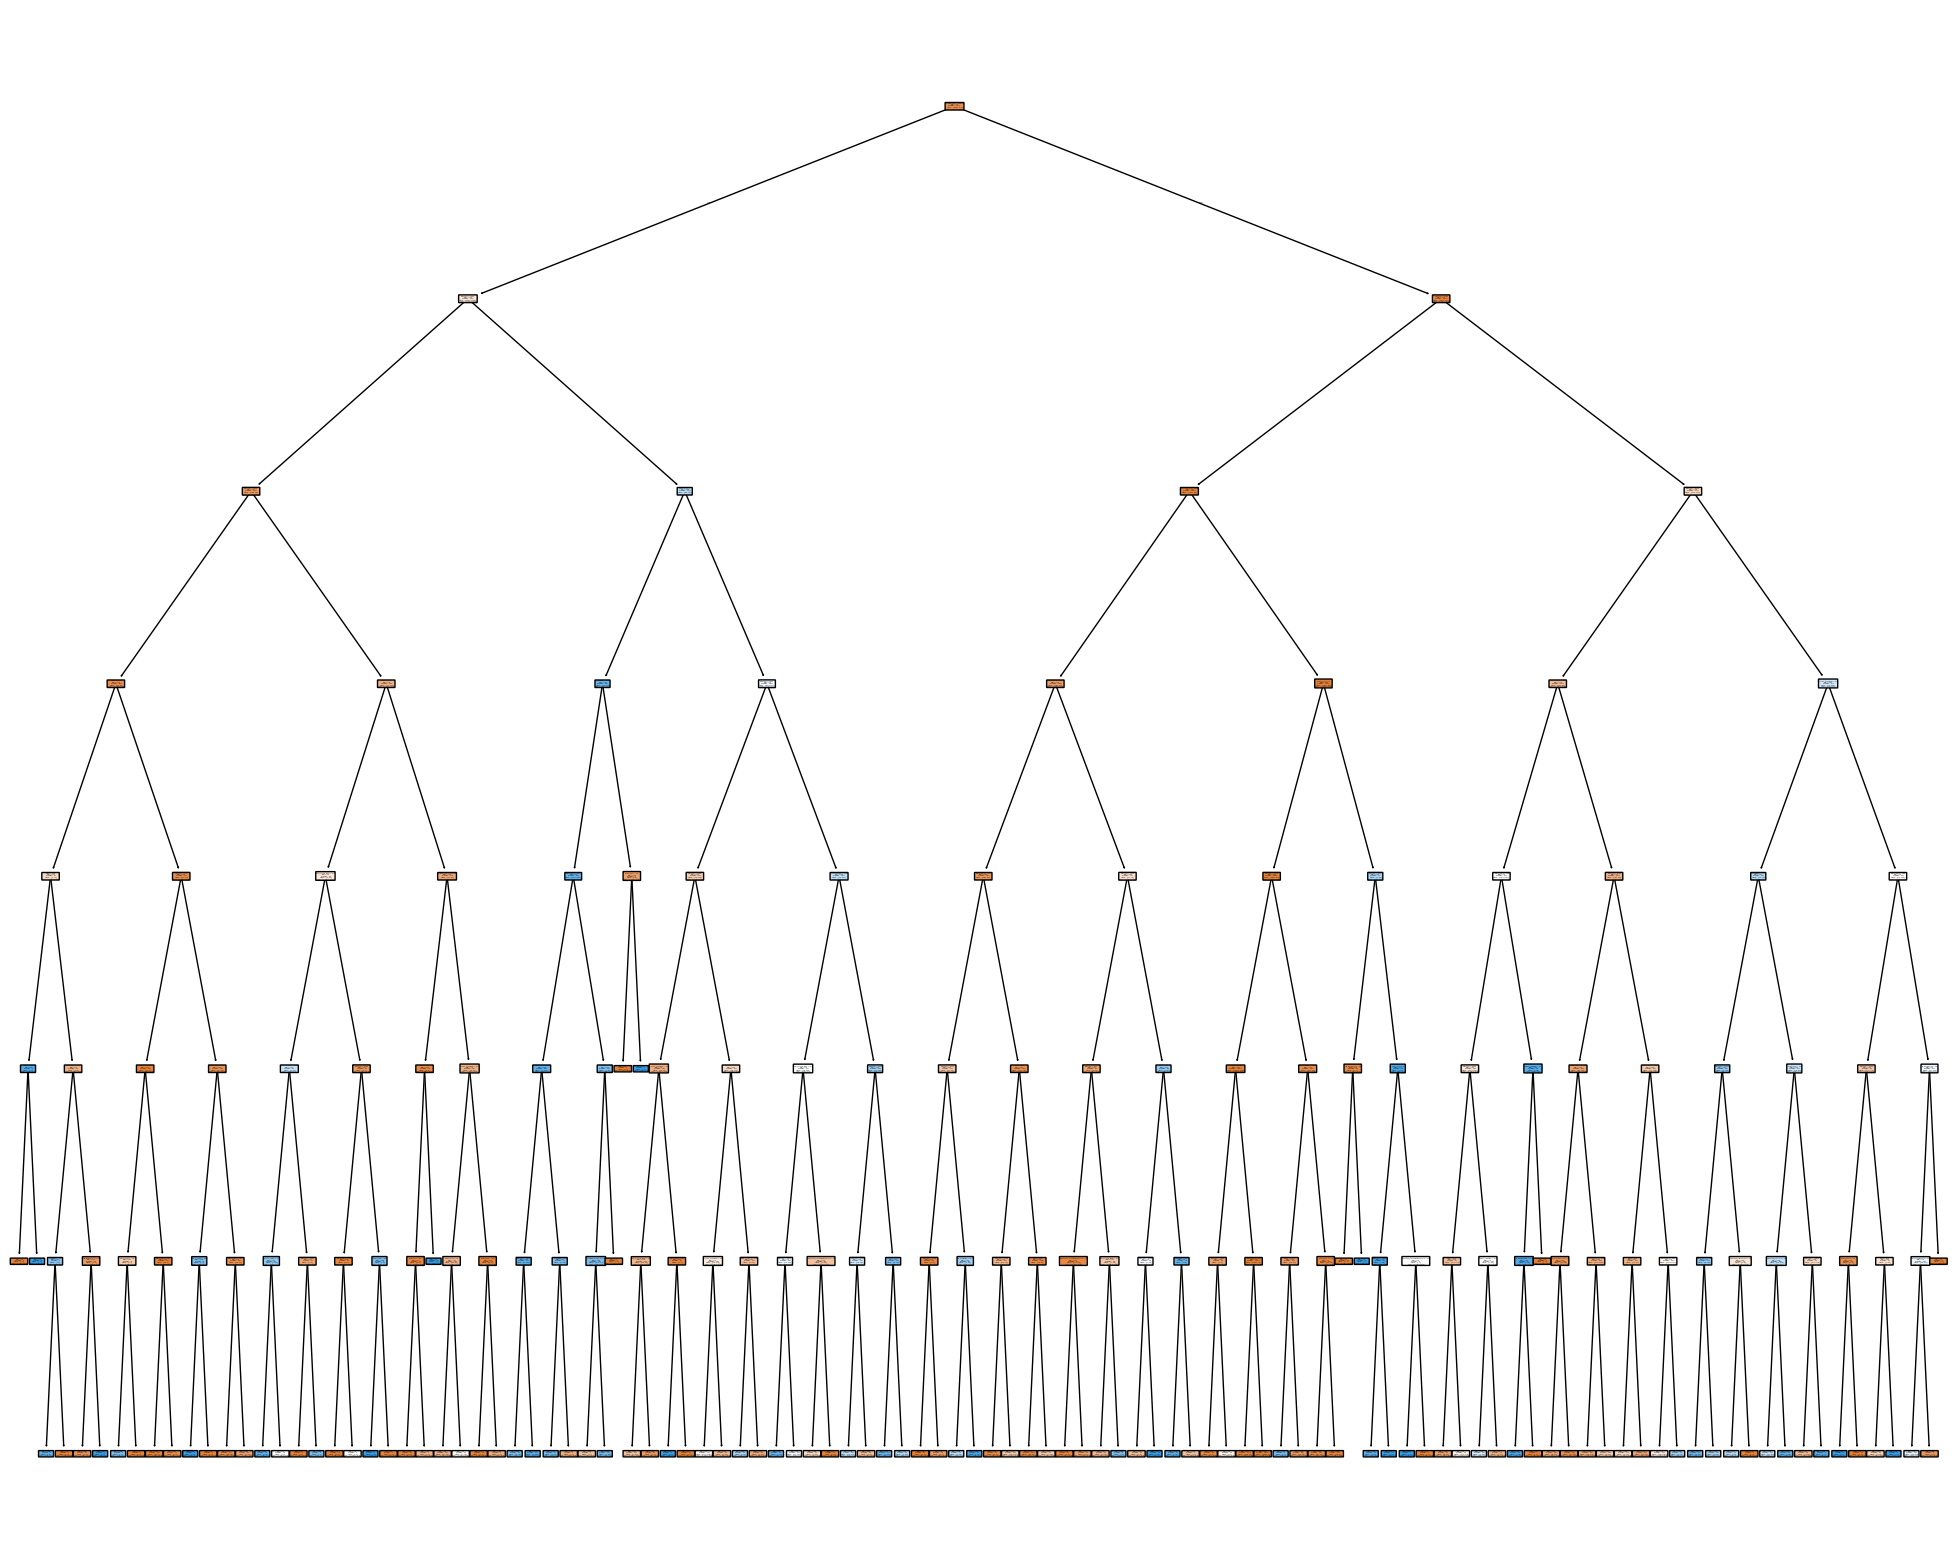

Decision tree visualization saved as 'decision_tree.png' and displayed.


In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a figure and axes for the plot
plt.figure(figsize=(25, 20))

# Visualize the decision tree
plot_tree(dtree_classifier,
          filled=True,
          rounded=True,
          class_names=['No Subscription', 'Subscription'],
          feature_names=X_processed.columns,
          precision=2)

# Save the plot as an image file
plt.savefig('decision_tree.png')

# Display the plot
plt.show()
print("Decision tree visualization saved as 'decision_tree.png' and displayed.")

In [10]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = dtree_classifier.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10968
           1       0.65      0.57      0.61      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.77      0.78     12357
weighted avg       0.91      0.92      0.91     12357



In [11]:
from sklearn.metrics import accuracy_score

# Calculate training accuracy
y_train_pred = dtree_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9236
Test Accuracy: 0.9166


In [12]:
import pandas as pd

# Get feature importances
feature_importances = dtree_classifier.feature_importances_

# Create a pandas Series for better readability
feature_importances_df = pd.Series(feature_importances, index=X_processed.columns)

# Sort the feature importances in descending order
feature_importances_df = feature_importances_df.sort_values(ascending=False)

print("Top 10 Feature Importances:")
print(feature_importances_df.head(10))

Top 10 Feature Importances:
duration             0.483687
nr.employed          0.323436
euribor3m            0.041885
pdays                0.038987
cons.conf.idx        0.031470
age                  0.019094
month_oct            0.014248
cons.price.idx       0.009310
contact_telephone    0.005352
campaign             0.005053
dtype: float64
